In [15]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# To scale numerical varaibles
from sklearn.preprocessing import StandardScaler

# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To check model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,make_scorer,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

In [2]:
# Load Data
data = pd.read_csv('/workspaces/Predicting-Potential-Customers/notebooks/preprocessed_leads.csv')

# Overview
data

,age,website_visits,time_spent_on_website,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,last_activity_Phone Activity,last_activity_Website Activity,age_group_26-35,age_group_36-45,age_group_46-55,age_group_55+,profile_completed_high,profile_completed_medium
0,57,7,1639,1,0,1,0,0,1,False,True,True,False,True,False,False,False,True,1,0
1,56,2,83,0,0,0,1,0,0,False,False,False,False,True,False,False,False,True,0,1
2,52,3,330,0,0,1,0,0,0,False,False,True,False,True,False,False,True,False,0,1
3,53,4,464,0,0,0,0,0,1,False,True,True,False,True,False,False,True,False,1,0
4,23,4,600,0,0,0,0,0,0,True,False,True,False,False,False,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,0,0,0,1,0,0,False,True,False,True,False,True,False,False,False,0,1
4608,55,8,2327,0,0,0,0,0,0,False,False,False,False,False,False,False,True,False,0,1
4609,58,2,212,0,0,0,0,0,1,False,False,True,False,False,False,False,False,True,1,0
4610,57,1,154,1,0,0,0,0,0,False,False,False,False,True,False,False,False,True,0,1


---
#### **Preparing data for modeling**
---

In [3]:
# Separate features and target
X = data.drop('status', axis=1)
y = data['status']

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("Data split into training and test sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Data split into training and test sets.
Training set shape: (3689, 19)
Test set shape: (923, 19)


In [9]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=[np.number]).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Numerical features scaled.")

Numerical features scaled.


### Analyze further before model training

In [10]:
# Combine X and y for analysis
df = X.copy()
df['status'] = y

In [11]:
print("Dataset shape:", df.shape)
print("\nFeature names:")
print(df.columns.tolist())

Dataset shape: (4612, 20)

Feature names:
['age', 'website_visits', 'time_spent_on_website', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'current_occupation_Student', 'current_occupation_Unemployed', 'first_interaction_Website', 'last_activity_Phone Activity', 'last_activity_Website Activity', 'age_group_26-35', 'age_group_36-45', 'age_group_46-55', 'age_group_55+', 'profile_completed_high', 'profile_completed_medium', 'status']


In [12]:
print("\nBasic statistics of numerical features:")
df.describe()


Basic statistics of numerical features:


,age,website_visits,time_spent_on_website,print_media_type1,print_media_type2,digital_media,educational_channels,referral,profile_completed_high,profile_completed_medium,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.00000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,0.107762,0.05052,0.114267,0.152862,0.020165,0.490893,0.485906,0.298569
std,13.161454,2.829134,743.828683,0.310114,0.21904,0.318170,0.359894,0.140579,0.499971,0.499856,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,3.000000,376.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,5.000000,1336.750000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,63.000000,30.000000,2537.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
print("\nConverion distribution:")
df['status'].value_counts(normalize=True)


Converion distribution:


status
0    0.701431
1    0.298569
Name: proportion, dtype: float64

**Observation**:
- The class balance is as expected (around 30% conversion rate).
---

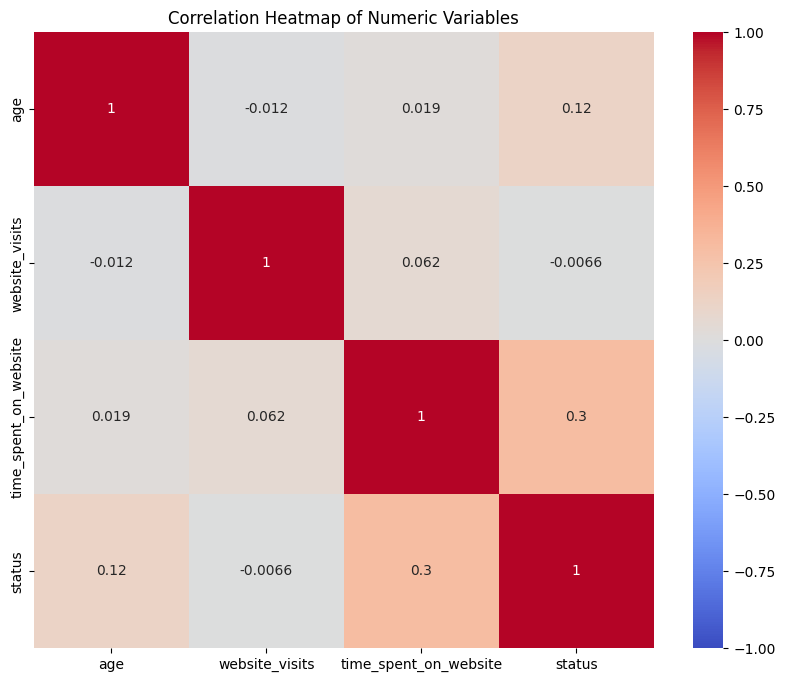

In [16]:
numeric_cols_df = ['age', 'website_visits', 'time_spent_on_website', 'status']
correlation_matrix_df = data[numeric_cols_df].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [17]:
n_features = len(numeric_cols_df)
n_rows = (n_features + 1) // 2

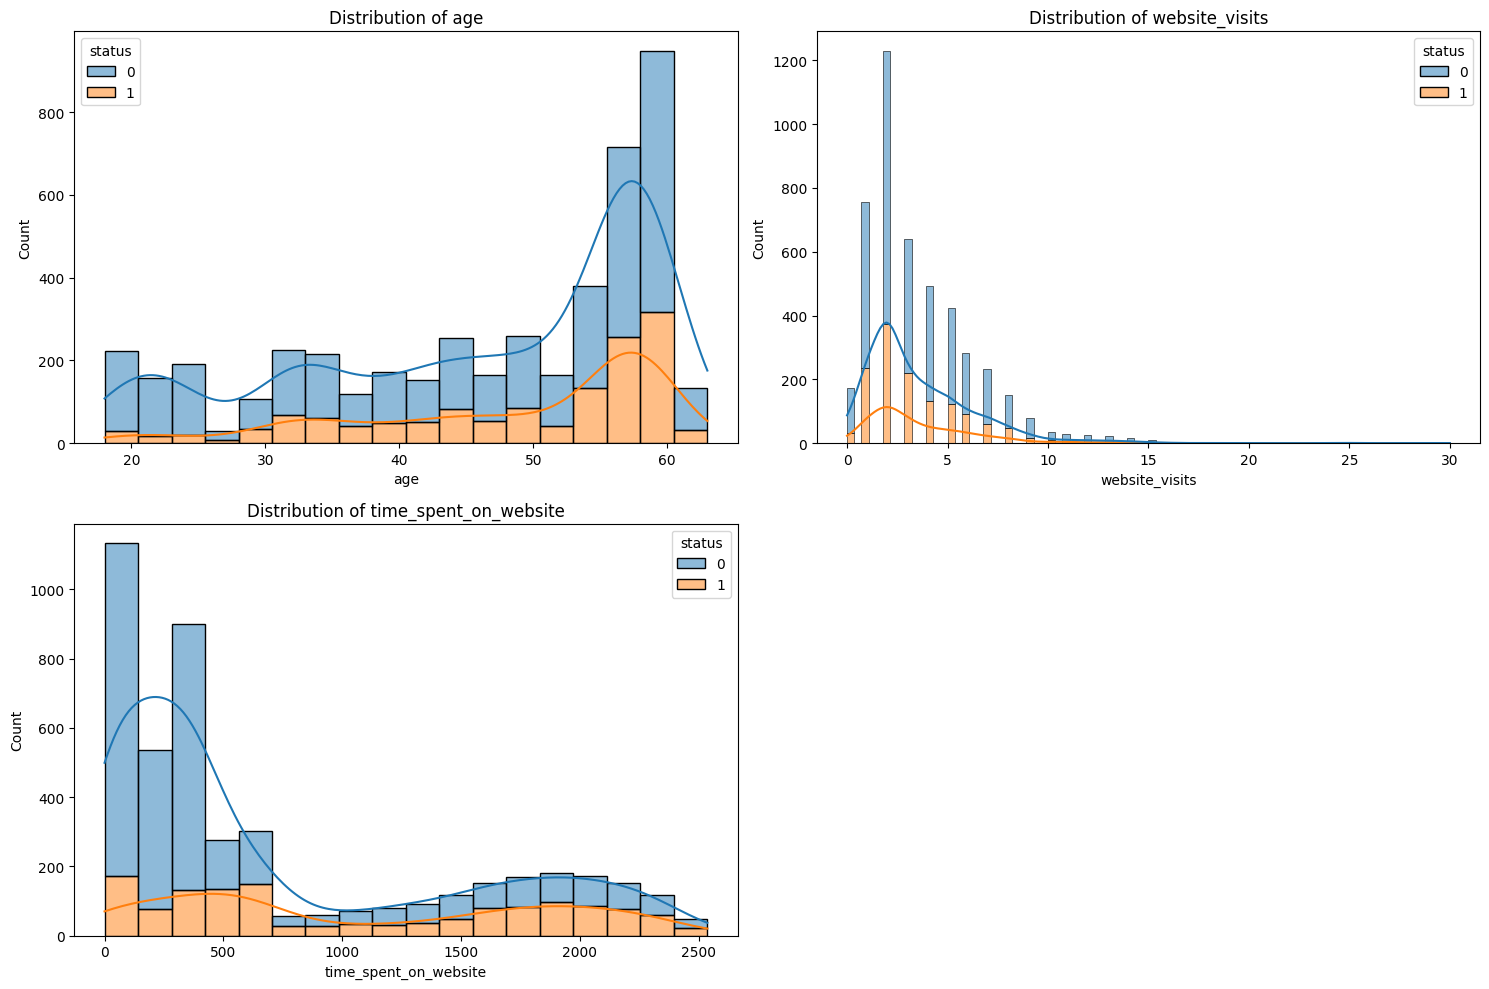

In [18]:
plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(numeric_cols_df):
    if feature != 'status':
        plt.subplot(n_rows, 2, i+1)
        sns.histplot(data=df, x=feature, hue='status', kde=True, multiple="stack")
        plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Building a Decision Tree model
---
Since we are dealing with imbalanced datasets, we will be using the `class_weight` parameter to assign different weights to the classes. It helps the model pay more attention to the minority class.

In [19]:
# Building decision tree model
dt = DecisionTreeClassifier(random_state=7, class_weight={0: 0.3, 1: 0.7})

In [20]:
# Fitting decision tree model
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 0.3, 1: 0.7}"


**Let's check the model performance of decision tree**

In [21]:
def metrics_score(actual, predicted):
    # Print classification report
    print("Classification Report:")
    print(classification_report(actual, predicted))
    
    # Calculate and print accuracy score
    acc = accuracy_score(actual, predicted)
    print(f"\nAccuracy Score: {acc:.4f}")

    # Create confusion matrix
    cm = confusion_matrix(actual, predicted)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Converted', 'Converted'], 
                yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2586
           1       1.00      1.00      1.00      1103

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689


Accuracy Score: 0.9997


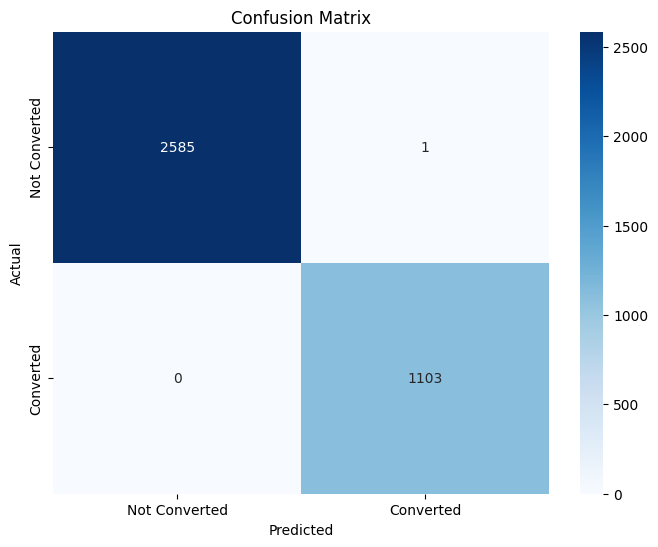

In [22]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

- The model shows perfect scores across all metrics (precision, recall, f1-score) for both classes (0 and 1), with an overall accuracy of 100% (or 0.9997 as per the Accuracy Score). 
- In this case, the **Recall** for both classes is 1.00, which is ideal.

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       649
           1       0.66      0.66      0.66       274

    accuracy                           0.80       923
   macro avg       0.76      0.76      0.76       923
weighted avg       0.80      0.80      0.80       923


Accuracy Score: 0.7996


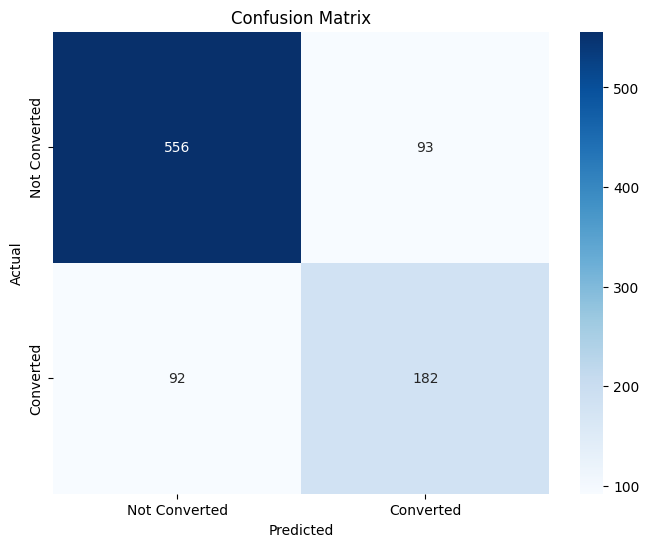

In [23]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations**:
- The model shows clear signs of **overfitting**. It has perfect performance on the training data (100% accuracy) but significantly lower performance on the test data (80% accuracy). While accuracy is a common metric, it can be misleading in the presence of class imbalance. So, it's important we look at other metrics like precision, recall, and F1-score.
- The model's ability to generalize to new, unseen data (as represented by the test set) is limited.
- **Recall** of 0.66 means that the model correctly identified 66% of all actual class 1 instances. This is lower than class 0, but it's not uncommon in cases of class imbalance.
- The **lower recall** and **precision** for class 1 indicates that the model struggles to correctly classify some of the minority class instances, which is a common challenge in classification tasks with imbalanced datasets.

---

#### **Feature Importances**

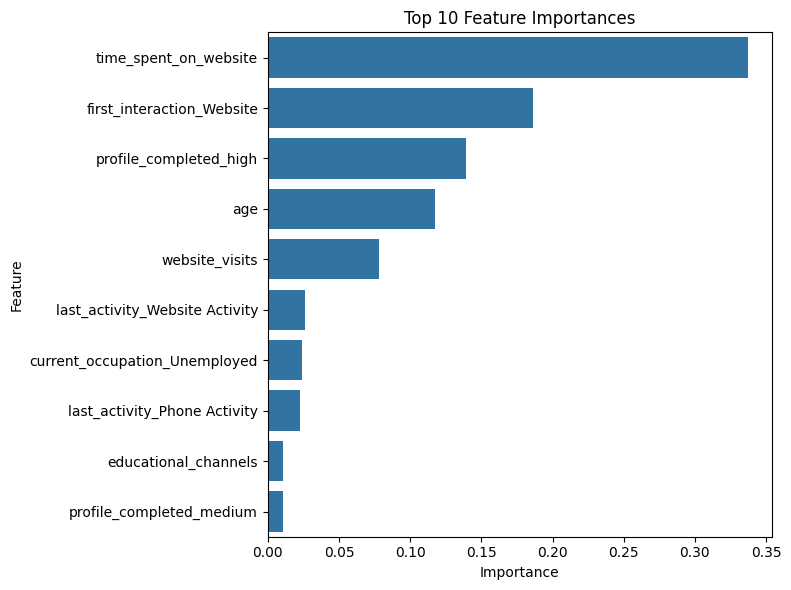

Feature Importances:
time_spent_on_website: 0.3373
first_interaction_Website: 0.1860
profile_completed_high: 0.1394
age: 0.1177
website_visits: 0.0779
last_activity_Website Activity: 0.0263
current_occupation_Unemployed: 0.0243
last_activity_Phone Activity: 0.0225
educational_channels: 0.0109
profile_completed_medium: 0.0105


In [24]:
# Get feature importances from the model
importances = dt.feature_importances_
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'feature': feature_names[indices],
    'importance': importances[indices]
})

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=importance_df[:10])  # Plot top 10 features
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print the feature importances
print("Feature Importances:")
for i, feature in enumerate(importance_df['feature'][:10]):
    print(f"{feature}: {importance_df['importance'][i]:.4f}")

## Building a Random Forest model

In [25]:
# Create the Random Forest Classifier
rf_model = RandomForestClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=1)

# Train the model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
# Predictions on training data
y_train_pred_rf = rf_model.predict(X_train)

# Predictions on test data
y_test_pred_rf = rf_model.predict(X_test)

Random Forest Model Performance

Training Set Performance:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2586
           1       1.00      1.00      1.00      1103

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689


Accuracy Score: 0.9997


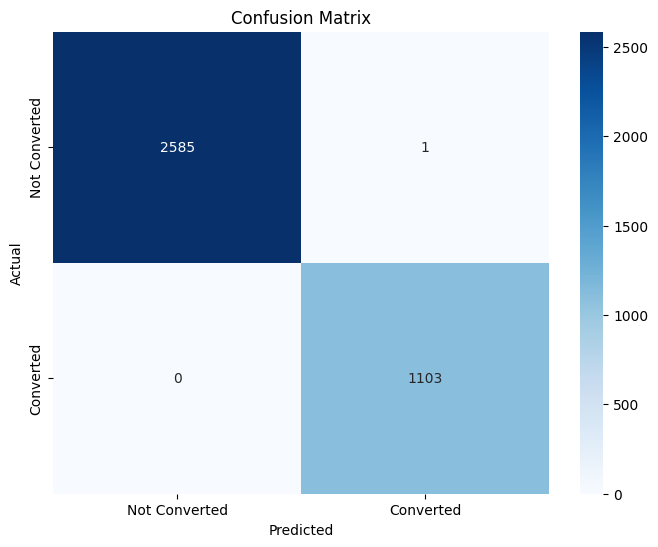



Test Set Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       649
           1       0.80      0.69      0.74       274

    accuracy                           0.86       923
   macro avg       0.84      0.81      0.82       923
weighted avg       0.86      0.86      0.85       923


Accuracy Score: 0.8581


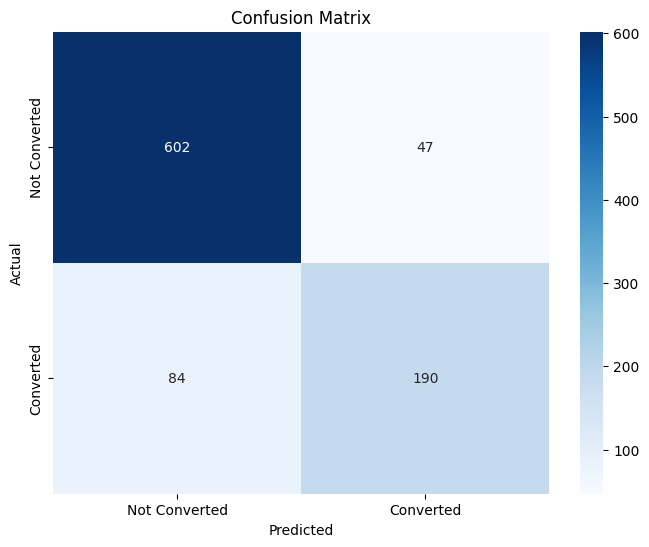

In [27]:
print("Random Forest Model Performance")
print("\nTraining Set Performance:")
metrics_score(y_train, y_train_pred_rf)

print("\n" + "="*50 + "\n")  # Separator for better readability

print("Test Set Performance:")
metrics_score(y_test, y_test_pred_rf)

**Observation**:
- The model shows **signs of overfitting**, with perfect performance on the training set and lower performance on the test set. However, the test set performance is good.
- The model's performance on the minority class (1) is weaker on the test set, with a **lower recall (0.69)** and **F1-score (0.74)**. This suggests that the model is still struggling to generalize well on the minority class, which is common in imbalanced datasets.
- Despite the overfitting, the **model's performance on the test set** is still reasonably good, with an accuracy of 85.37%.
- The **model performs relatively well on class 0** in the test set, with high precision (0.88) and recall (0.93), which suggests that it can identify the majority class well.

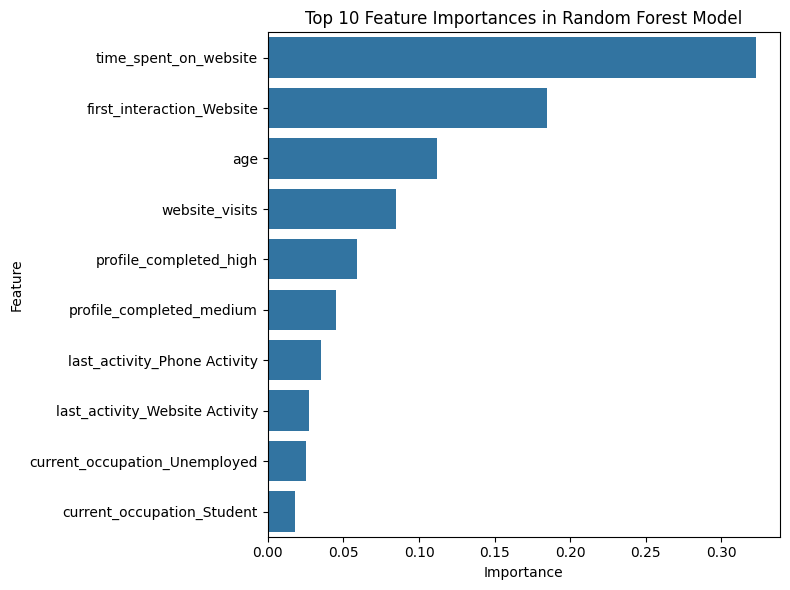


Top 10 Feature Importances:
                           feature  importance
2            time_spent_on_website    0.322569
10       first_interaction_Website    0.184761
0                              age    0.112018
1                   website_visits    0.084474
17          profile_completed_high    0.058918
18        profile_completed_medium    0.044882
11    last_activity_Phone Activity    0.035029
12  last_activity_Website Activity    0.026941
9    current_occupation_Unemployed    0.025379
8       current_occupation_Student    0.017688


In [28]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top 15 feature importances
print("\nTop 10 Feature Importances:")
print(feature_importance.head(10))

**Observations**:
- By far the most important feature `time_spent_on_website`, suggesting that engagement on the website is a crucial factor in conversion.
- The second most important feature `first_interaction_Website`, indicating that how a lead first interacts with the company (specifically via the website) is very significant.
- The third most important feature `age`, suggesting that age plays a significant role in conversion likelihood.
- The number of times a lead visits the website is also quite important.
- The level of profile completion seems to be a moderate indicator of conversion potential.

The most important features (`time_spent_on_website`, `first_interaction_Website`, and `website_visits`) are strongly related to **user engagement**. This suggests that how users interact with the website is a key driver of the target outcome.